In [2]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from sklearn.mixture import GaussianMixture
import math
import scipy as sc
from scipy import stats
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [0]:
PATHDATA = 'audiosData.csv'
df = pd.read_csv(PATHDATA, header = None)
data = df.values #Convertimos en un  numpy array

## Dividir el dataset usando GroupShuffleSplit


In [15]:
data.shape

(5200, 164)

In [84]:
X = data[:,0:-2]
Y = data[:,-1]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-2:-1]


Tamaño dataSet (5200, 162)




In [93]:
groups_count = np.unique(groups,return_counts=True)
np.max(groups_count[1])


29

In [86]:
groups

array([[ 13.],
       [ 15.],
       [ 15.],
       ...,
       [784.],
       [784.],
       [784.]])

In [0]:

def build_model(model, parameters, folds, train_size, X,Y):
  acc_scorer = make_scorer(accuracy_score)
  recalls = make_scorer(recall_score,average='micro')##buscar por que micro
  precision = make_scorer(precision_score,average='micro')
  f1 = make_scorer(f1_score,average='micro')
  scores =  {'recalls':recalls,'precision':precision,'f1':f1,'Accuracy': make_scorer(accuracy_score)}
  gss = GroupShuffleSplit(n_splits=folds, train_size=train_size, random_state=0)
  model = GridSearchCV(model,parameters,scores,-1,refit='Accuracy',return_train_score=True, cv=gss.split(X, Y, groups=groups))
  model.fit(X,Y)
  return model 

In [0]:
def get_data_frame_results(dfRF,  args = ['mean_test_recalls',
                                        'std_test_recalls',
                                        'rank_test_recalls',
                                        'mean_train_recalls',
                                        'std_train_recalls',
                                        'mean_train_f1',
                                        'std_train_f1',
                                        'mean_test_Accuracy',
                                        'std_test_Accuracy',
                                        'rank_test_Accuracy',
                                        'std_train_Accuracy',
                                        'mean_train_Accuracy',
                                        'mean_fit_time',
                                        'std_fit_time',
                                        'mean_score_time',
                                        'std_score_time',
                                        'params'
          ]):



  data = {}

  for arg in args:
    data.update({arg: dfRF[arg]})
    
  # Data frame
  df_results = pd.DataFrame(data=data)
  return df_results

In [0]:
def learning_curve(model,parameters,folds, X,Y, suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy'):
    """
    Parameters
    ----------
    suptitle : str
        Chart suptitle
    title: str
        Chart title
    xlabel: str
        Label for the X axis
    ylabel: str
        Label for the y axis
    Returns
    -------
    Plot of learning curves
    """
    
    # create lists to store train and validation scores
    train_score = []
    val_score = []
    std_train= []
    std_val=[]
    bests_params=[]

    # create ten incremental training set sizes
    training_set_sizes = np.linspace(.1, .9, 5)

    # for each one of those training set sizes
    for i in training_set_sizes:

        model_trained = build_model(model, parameters, folds, i, X,Y)
        
        #Metrics, params 
        best_params = model_trained.cv_results_['params'][model_trained.best_index_]
        
        EfficiencyVal= model_trained.cv_results_['mean_test_Accuracy'][model_trained.best_index_]
        EfficiencyTrain=model_trained.cv_results_['mean_train_Accuracy'][model_trained.best_index_]
        stdTrain=model_trained.cv_results_['std_train_Accuracy'][model_trained.best_index_]
        stdVal=model_trained.cv_results_['std_test_Accuracy'][model_trained.best_index_]

        # store the scores in their respective lists
        train_score.append(EfficiencyTrain)
        val_score.append(EfficiencyVal)
        std_train.append(stdTrain)
        std_val.append(stdVal)
        bests_params.append(best_params)
    
    train_score =np.array(train_score)
    val_score =np.array(val_score)
    std_train =np.array(std_train)
    std_val =np.array(std_val)


    # plot learning curves
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.plot(training_set_sizes, train_score, c='gold')
    ax.plot(training_set_sizes, val_score, c='steelblue')
    
    ax.fill_between(training_set_sizes,train_score+std_train,train_score-std_train,facecolor='gold',alpha=0.5)
    ax.fill_between(training_set_sizes,val_score+std_val,val_score-std_val,facecolor='steelblue',alpha=0.5)

    # format the chart to make it look nice
    fig.suptitle(suptitle, fontweight='bold', fontsize='20')
    ax.set_title(title, size=20)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend(['Train set', 'Test set'], fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylim(0, 1)

    def percentages(x, pos):
        """The two args are the value and tick position"""
        if x < 1:
            return '{:1.0f}'.format(x*100)
        return '{:1.0f}%'.format(x*100)

    def numbers(x, pos):
        """The two args are the value and tick position"""
        if x >= 1000:
            return '{:1,.0f}'.format(x)
        return '{:1.0f}'.format(x)
    df_split_params = pd.DataFrame(list(zip(training_set_sizes, bests_params)),columns =['Train_Size', 'Params'])
    return df_split_params
    #y_formatter = FuncFormatter(percentages)
    #ax.yaxis.set_major_formatter(y_formatter)

    #x_formatter = FuncFormatter(numbers)
    #ax.xaxis.set_major_formatter(x_formatter)

  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Params
Train_Size,
0.1,"{'covariance_type': 'tied', 'n_components': 2}"
0.3,"{'covariance_type': 'tied', 'n_components': 1}"
0.5,"{'covariance_type': 'tied', 'n_components': 1}"
0.7,"{'covariance_type': 'tied', 'n_components': 2}"
0.9,"{'covariance_type': 'tied', 'n_components': 2}"


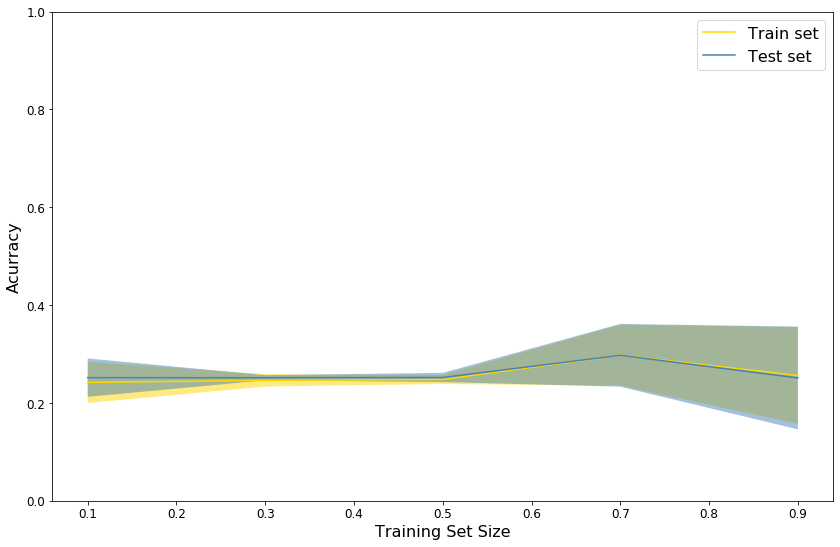

In [77]:
parameters ={'n_components' : [1,2],'covariance_type': ['tied']}
GMM =GaussianMixture()#Configurar el modelo

df_split_params =learning_curve(GMM,parameters,15, X,Y)
df_split_params.set_index('Train_Size', inplace=True)
df_split_params

In [0]:
df_results = get_data_frame_results(GMM_Trained.cv_results_)

In [0]:
df_results

,mean_test_recalls,std_test_recalls,rank_test_recalls,mean_train_recalls,std_train_recalls,mean_train_f1,std_train_f1,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,std_train_Accuracy,mean_train_Accuracy,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params
0,0.252181,0.009818,2,0.248566,0.006581,0.248566,0.006581,0.252181,0.009818,2,0.006581,0.248566,0.131018,0.017676,0.049956,0.001413,"{'covariance_type': 'tied', 'n_components': 1}"
1,0.286431,0.065322,1,0.287650,0.065415,0.287650,0.065415,0.286431,0.065322,1,0.065415,0.287650,1.154441,0.459392,0.089416,0.010240,"{'covariance_type': 'tied', 'n_components': 2}"
